# UK Car Accidents Analysis

**Coding 3 - Final Project**

*Sabina Umarova - Ersan Kucukoglu*

*31th March 2022*

## Introduction
In this project we are going to analyze  U.K car accidents data from year 2010 to 2015. We are going to respond two analytical questions by exploring the pattern of accident conditions across the country, and to see ig there is any relationships between environmental conditions and the number of accidents. For the second question, we are going to use Weather API data to see the relationship between accidents and weather in London, 2015.

The data comes from governemnt website www.data.gov.uk. UK police forces collect the accidents data using the form called Stats19. The data consists of all kind of vehicle collisons from 2005 to 2015. Every column of the dataset is in numerical format. A supporting document to understand each numerical category in accidents datset is provided on the www.data.gov.uk website as well. 

**Analytical Questions:**
1. How do environmental conditions (road type, light conditions, etc.) affect number of accidents ?
2. What are the patterns between number of accidents and weather conditions?

**The data consists of three main tables:**

- Accidents — 32 variables, detailing the location, time, date, lighting, weather, and road surface conditions, number of causalities, road type and other variables. 
- Casualties — Linked via ‘Accident Index’ to the Accidents table, the table has 15 columns, giving further detail on the casualties involved. There are 221,6720 rows.
- Vehicles — This table gives details of the vehicles involved in accidents but is not used in this project.

In [1]:
import os

In [2]:
os.getcwd()

'/Users/ersankucukoglu/Desktop/Projects/proje/code'

### Loading Packages

In [3]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### Import the Data

In [4]:
#load the datasets
accidents_raw = pd.read_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/raw/Accidents0515.csv')
casualties_raw = pd.read_csv('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/raw/Casualties0515.csv',on_bad_lines='skip')
refDataDict = pd.read_excel('/Users/ersankucukoglu/Desktop/Projects/accidents_python-project/data/raw/Road-Accident-Safety-Data-Guide.xls',sheet_name=None)

## Data Cleaning

First of all, in both data accidents and casualties, the categorical data stored as numeric a numeric code with seperate spreadsheet detailing the m eaning of each of code for each variable. In order to understand the data into readable format, it was loaded, along with the dictionary, into Pandas DataFrames and codes translated to values.

In [5]:
## Translate Data 

# Reference data codes
pf = refDataDict['Police Force'].set_index('code')
accidents_raw['Police_Force'] = accidents_raw['Police_Force'].apply(lambda x: pf.loc[x,'label'])

accSev = refDataDict['Accident Severity'].set_index('code')
accidents_raw['Accident_Severity'] = accidents_raw['Accident_Severity'].apply(lambda x: accSev.loc[x,'label'])

DoW = refDataDict['Day of Week'].set_index('code')
accidents_raw['Day_of_Week'] = accidents_raw['Day_of_Week'].apply(lambda x: DoW.loc[x,'label'])

RC1 = refDataDict['1st Road Class'].set_index('code')
accidents_raw['1st_Road_Class'] = accidents_raw['1st_Road_Class'].apply(lambda x: RC1.loc[x,'label'])

RT = refDataDict['Road Type'].set_index('code')
accidents_raw['Road_Type'] = accidents_raw['Road_Type'].apply(lambda x: RT.loc[x,'label'])

JD = refDataDict['Junction Detail'].set_index('code')
accidents_raw['Junction_Detail'] = accidents_raw['Junction_Detail'].apply(lambda x: JD.loc[x,'label'])

JC = refDataDict['Junction Control'].set_index('code')
accidents_raw['Junction_Control'] = accidents_raw['Junction_Control'].apply(lambda x: JC.loc[x,'label'])

PCH = refDataDict['Ped Cross - Human'].set_index('code')
accidents_raw['Pedestrian_Crossing-Human_Control'] = accidents_raw['Pedestrian_Crossing-Human_Control'].apply(lambda x: PCH.loc[x,'label'])

PCPh = refDataDict['Ped Cross - Physical'].set_index('code')
accidents_raw['Pedestrian_Crossing-Physical_Facilities'] = accidents_raw['Pedestrian_Crossing-Physical_Facilities'].apply(lambda x: PCPh.loc[x,'label'])

LC = refDataDict['Light Conditions'].set_index('code')
accidents_raw['Light_Conditions'] = accidents_raw['Light_Conditions'].apply(lambda x: LC.loc[x,'label'])

Weather = refDataDict['Weather'].set_index('code')
accidents_raw['Weather_Conditions'] = accidents_raw['Weather_Conditions'].apply(lambda x: Weather.loc[x,'label'])

RS = refDataDict['Road Surface'].set_index('code')
accidents_raw['Road_Surface_Conditions'] = accidents_raw['Road_Surface_Conditions'].apply(lambda x: RS.loc[x,'label'])

UrbRur = refDataDict['Urban Rural'].set_index('code')
accidents_raw['Urban_or_Rural_Area'] = accidents_raw['Urban_or_Rural_Area'].apply(lambda x: UrbRur.loc[x,'label'])

CasClass = refDataDict['Casualty Class'].set_index('code')
casualties_raw['Casualty_Class'] = casualties_raw['Casualty_Class'].apply(lambda x: CasClass.loc[x,'label'])

CasSex = refDataDict['Sex of Casualty'].set_index('code')
casualties_raw['Sex_of_Casualty'] = casualties_raw['Sex_of_Casualty'].apply(lambda x: CasSex.loc[x,'label'])



## Accidents dataset

#### Quick look at the data:

In [136]:
nRow, nCol = accidents_raw.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 1780653 rows and 32 columns.


In [137]:
accidents_raw.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,Metropolitan Police,Serious,1,1,04/01/2005,...,None within 50 metres,Zebra,Daylight,Raining no high winds,Wet or damp,0,0,Urban,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,Metropolitan Police,Slight,1,1,05/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,Metropolitan Police,Slight,2,1,06/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,Metropolitan Police,Slight,1,1,07/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,0,0,Urban,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,Metropolitan Police,Slight,1,1,10/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,Fine no high winds,Wet or damp,0,0,Urban,1,E01002863
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,Metropolitan Police,Slight,2,1,11/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,6,0,Urban,1,E01002832
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,Metropolitan Police,Slight,2,1,13/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01002875
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,Metropolitan Police,Slight,1,2,14/01/2005,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,0,0,Urban,1,E01002889
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,Metropolitan Police,Slight,2,2,15/01/2005,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,0,0,Urban,1,E01002900
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,Metropolitan Police,Slight,2,5,15/01/2005,...,None within 50 metres,Central refuge,Daylight,Fine no high winds,Dry,0,0,Urban,1,E01002875


In [138]:
#info attribute gives info about dataframe
accidents_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 object 
 6   Accident_Severity                            object 
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  object 
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

**Summary Stats of Accidents variables**

In [139]:
accidents_raw.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,1.780515e+06,1.780515e+06,1.780515e+06,1.780515e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06,1.780653e+06
mean,4.401799e+05,2.985128e+05,-1.428579e+00,5.257450e+01,1.832064e+00,1.349454e+00,3.532614e+02,1.007861e+03,3.902833e+01,2.662583e+00,3.782832e+02,1.090639e-01,7.219374e-02,1.193455e+00
std,9.547599e+04,1.612254e+05,1.403495e+00,1.451753e+00,7.148732e-01,8.237479e-01,2.593133e+02,1.821236e+03,1.415857e+01,3.208896e+00,1.297375e+03,7.304625e-01,6.193070e-01,4.011830e-01
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.764000e+05,1.779900e+05,-2.354786e+00,5.148769e+01,1.000000e+00,1.000000e+00,1.220000e+02,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,4.413200e+05,2.649500e+05,-1.386472e+00,5.227209e+01,2.000000e+00,1.000000e+00,3.280000e+02,1.280000e+02,3.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,5.234235e+05,3.965700e+05,-2.164865e-01,5.346409e+01,2.000000e+00,1.000000e+00,5.310000e+02,7.250000e+02,5.000000e+01,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,6.555400e+05,1.208800e+06,1.762010e+00,6.075754e+01,6.700000e+01,9.300000e+01,9.410000e+02,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,7.000000e+00,7.000000e+00,3.000000e+00


**Check the column names of the accidents data.**

In [140]:
#column names
accidents_raw.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

**Check the total null values for each variable.**

In [141]:
accidents_raw.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

**Drop Na values.**

In [89]:
#drop na
accidents = accidents_raw.dropna()

In [90]:
accidents = accidents[(accidents['Light_Conditions']!='Data missing or out of range') &
              (accidents['Weather_Conditions']!='Data missing or out of range') &
              (accidents['Weather_Conditions']!='Unknown') &
              (accidents['Road_Surface_Conditions']!='Data missing or out of range')]

**Convert the date to datetime64, and set index 'Date', filter the date between 2010 and 2015.**

In [142]:
accidents['Date'] = pd.to_datetime(accidents['Date'], format='%d/%m/%Y')
accidents=accidents.set_index('Date').sort_index()
accidents = accidents.loc['2010-01-01':'2015-12-31']

**What is the total number of accidents for each day?**

In [104]:
#accidents = accidents.reset_index()
accidents.groupby('Date')['Accident_Index'].count()

Date
2010-01-01    267
2010-01-02    260
2010-01-03    244
2010-01-04    365
2010-01-05    350
             ... 
2015-12-27    236
2015-12-28    186
2015-12-29    276
2015-12-30    237
2015-12-31    294
Name: Accident_Index, Length: 2191, dtype: int64

**Correlation between the variables**

<AxesSubplot:>

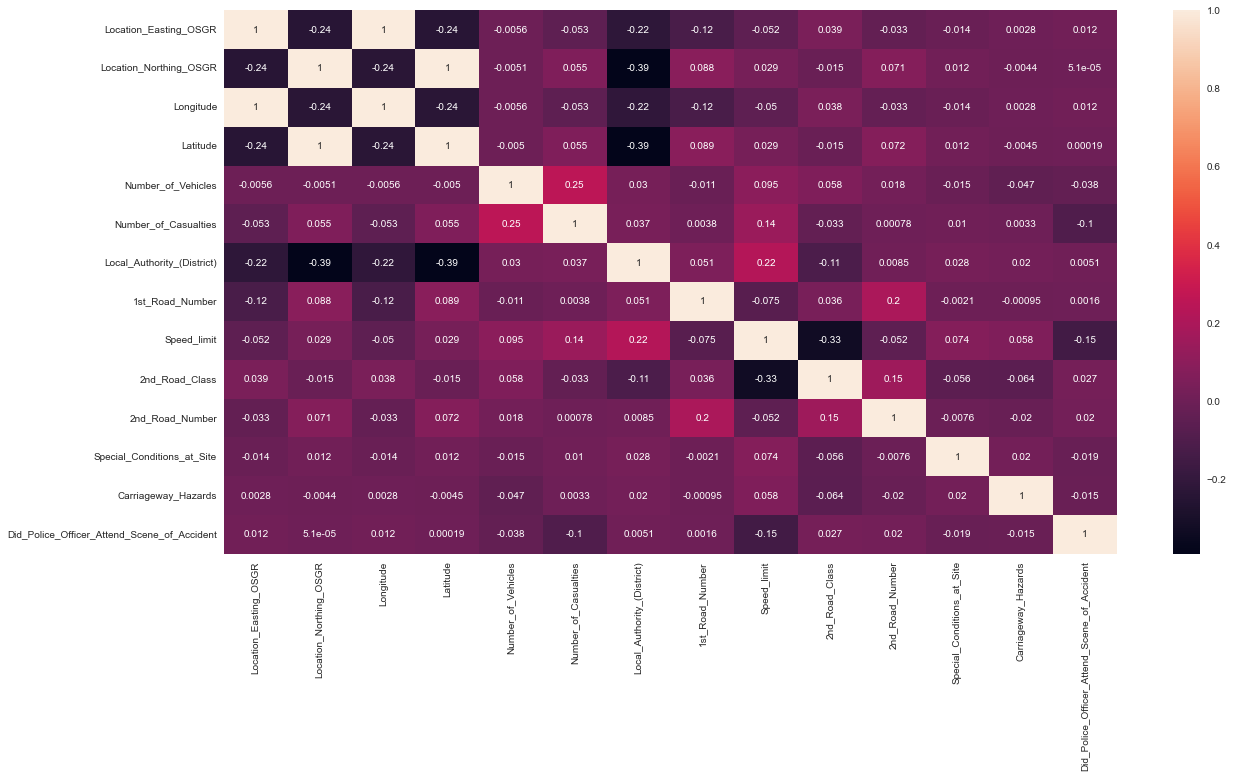

In [96]:
#correlation 
accidents_corr = accidents.corr()
plt.figure(figsize=(20,10))
sns.heatmap(accidents_corr, annot=True)

**What is the number of accidents per each day?**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


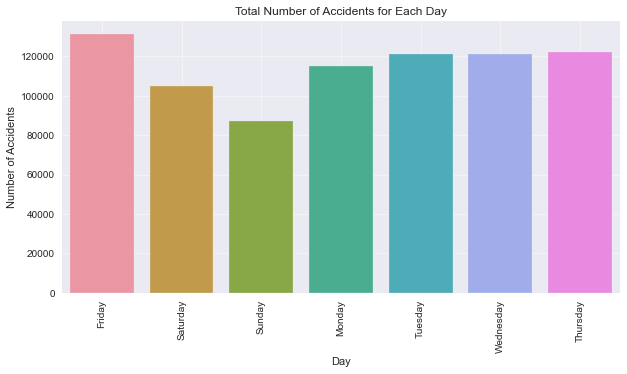

In [144]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Day_of_Week',data=accidents)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.title('Total Number of Accidents for Each Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

 Using longitude and latitude information, we can see what area has the most accidents based on accident severity(slight-serious-fatal). However, it actually depends on how much traffic the area has. The accident plots acan give us really good idea about traffic in any area of the UK.

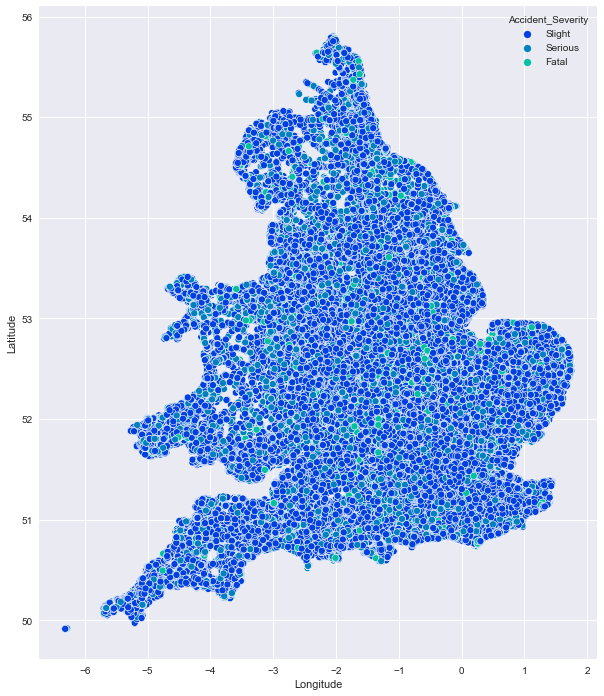

In [133]:
#quantity and severity of the accidents
plt.figure(figsize = (10,12))
sns.scatterplot(data=accidents, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.show()

Summary of the distribution of the accidents based on the environmental condition such as Light condition, Weather Conditions, and Road Surface Conditions.

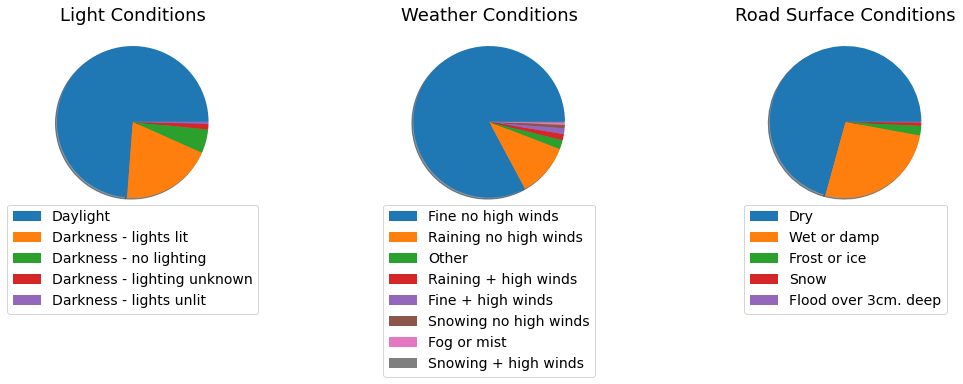

In [61]:
#Plot summary of accident counts for each value of each environmental condition
fig4,ax4 = plt.subplots(1,3,figsize=(15,5))
ax4[0].pie(accidents['Light_Conditions'].value_counts(), shadow=True)
ax4[0].set_title('Light Conditions',fontsize=18)
pieleg0 = ax4[0].legend(labels=accidents['Light_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
ax4[1].pie(accidents['Weather_Conditions'].value_counts(), shadow=True)
ax4[1].set_title('Weather Conditions',fontsize=18)
pieleg1 = ax4[1].legend(labels=accidents['Weather_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
ax4[2].pie(accidents['Road_Surface_Conditions'].value_counts(), shadow=True)
ax4[2].set_title('Road Surface Conditions',fontsize=18)
pieleg2 = ax4[2].legend(labels=accidents['Road_Surface_Conditions'].value_counts().index,bbox_to_anchor=(0.5,0.1), fontsize=14,loc="upper center")
plt.savefig('Condition Pies.jpg', bbox_extra_artists=(pieleg0,pieleg1,pieleg2), bbox_inches='tight')
plt.tight_layout()


## Casualties dataset

#### Quick look at the data:

In [146]:
nRow, nCol = casualties_raw.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 2216720 rows and 15 columns.


In [147]:
casualties_raw.head(10)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,Pedestrian,Male,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,Passenger,Male,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,Driver or rider,Male,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,Pedestrian,Male,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,Driver or rider,Male,49,8,3,0,0,0,0,-1,3,-1
5,200501BS00006,2,1,Driver or rider,Female,30,6,3,0,0,0,0,-1,3,1
6,200501BS00007,1,1,Driver or rider,Male,31,6,3,0,0,0,0,-1,3,-1
7,200501BS00009,1,1,Pedestrian,Female,13,3,3,6,9,0,0,-1,0,1
8,200501BS00009,1,2,Pedestrian,Female,13,3,3,6,9,0,0,-1,0,1
9,200501BS00010,1,1,Driver or rider,Male,35,6,3,0,0,0,0,-1,9,1


In [148]:
#info attribute gives info about dataframe
casualties_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      object
 4   Sex_of_Casualty                     object
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(12), object(3)
memory usage: 253.7+ MB


**Summary Stats of Casualties variables**

In [149]:
#summary stats
casualties_raw.describe()

,Vehicle_Reference,Casualty_Reference,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
count,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06,2.216720e+06
mean,1.485031e+00,1.433611e+00,3.435309e+01,6.020044e+00,2.866671e+00,6.663922e-01,4.740599e-01,2.828526e-01,9.074669e-02,-6.254159e-01,7.510757e+00,9.904936e-01
std,6.671878e-01,1.404250e+00,1.885804e+01,2.406346e+00,3.692819e-01,1.959742e+00,1.660281e+00,5.933772e-01,5.674798e-01,5.526900e-01,7.170375e+00,1.031795e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,2.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,3.100000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.000000e+00,1.000000e+00
75%,2.000000e+00,2.000000e+00,4.600000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00
max,9.100000e+01,8.520000e+02,1.030000e+02,1.100000e+01,3.000000e+00,1.000000e+01,9.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,9.800000e+01,3.000000e+00


In [112]:
#column names
casualties_raw.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [150]:
casualties_raw.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
dtype: int64

In [151]:
casualties = casualties_raw

**Check the correlation between the Casualties variables.**

<AxesSubplot:>

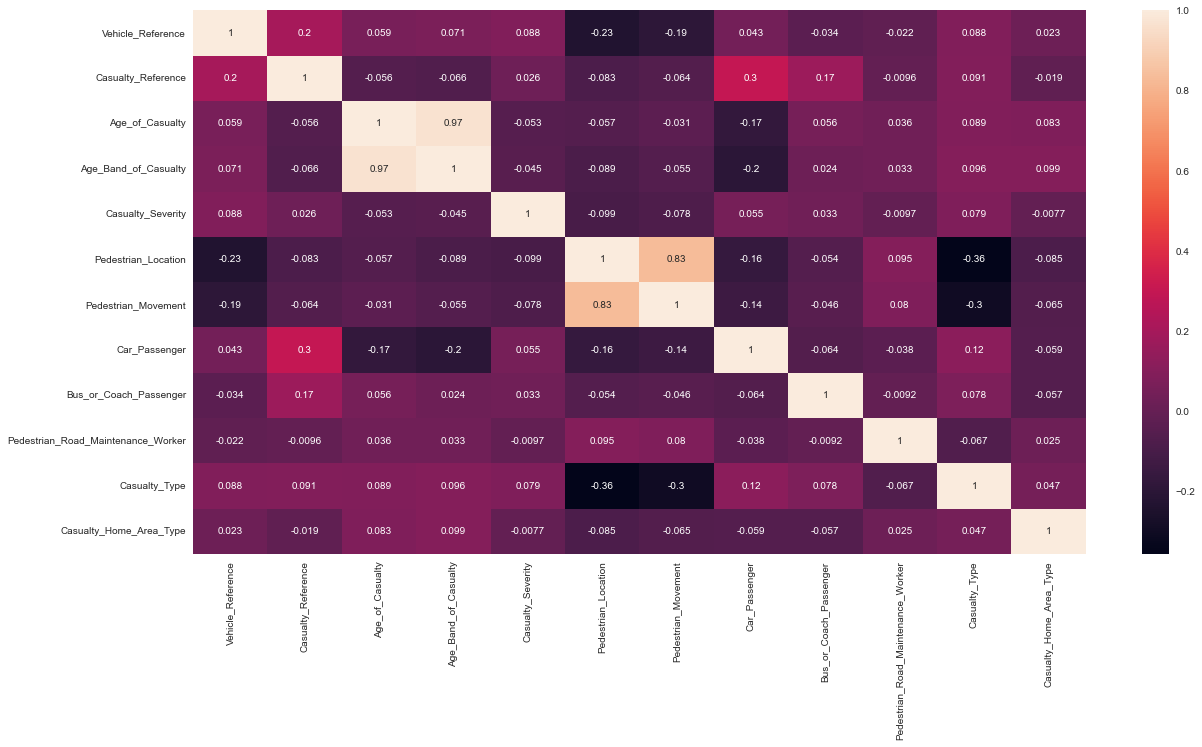

In [152]:
#correlation
casualties_corr = casualties.corr()
plt.figure(figsize=(20,10))
sns.heatmap(casualties_corr, annot=True)

**Look at the distribution of the casualties variables.**

<Figure size 576x396 with 0 Axes>

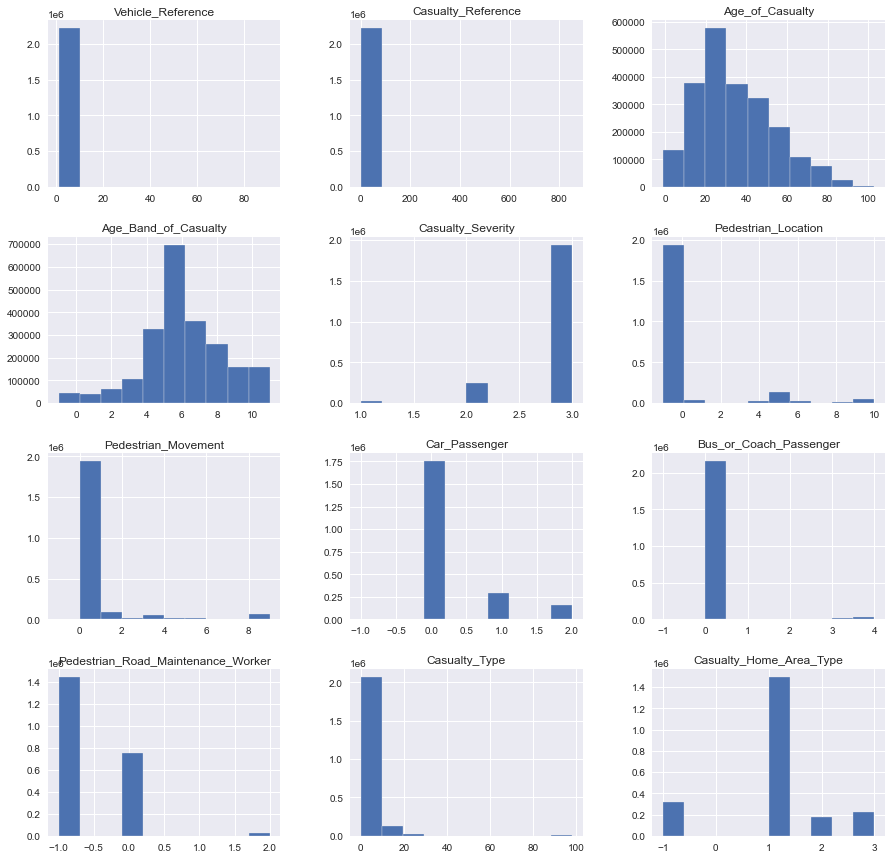

In [116]:
#Histograms
plt.figure()
casualties.hist(figsize=(15,15));

**Distrubution of casualties by age:**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


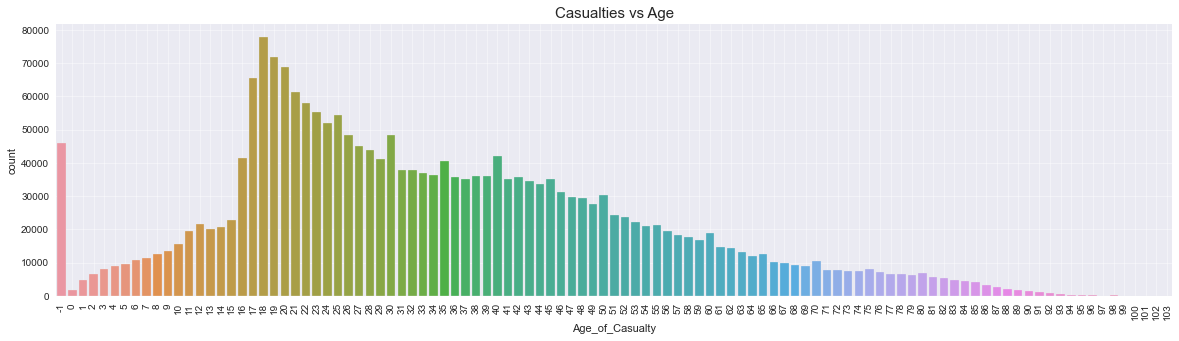

In [155]:

plt.figure(figsize=(20,5))
sns.countplot('Age_of_Casualty',data=casualties)
plt.title('Casualties vs Age', fontsize=15)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.show()

The distribution of the casualties by age is skewed to the right.

**Distrubution of casualties by age and gender:**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


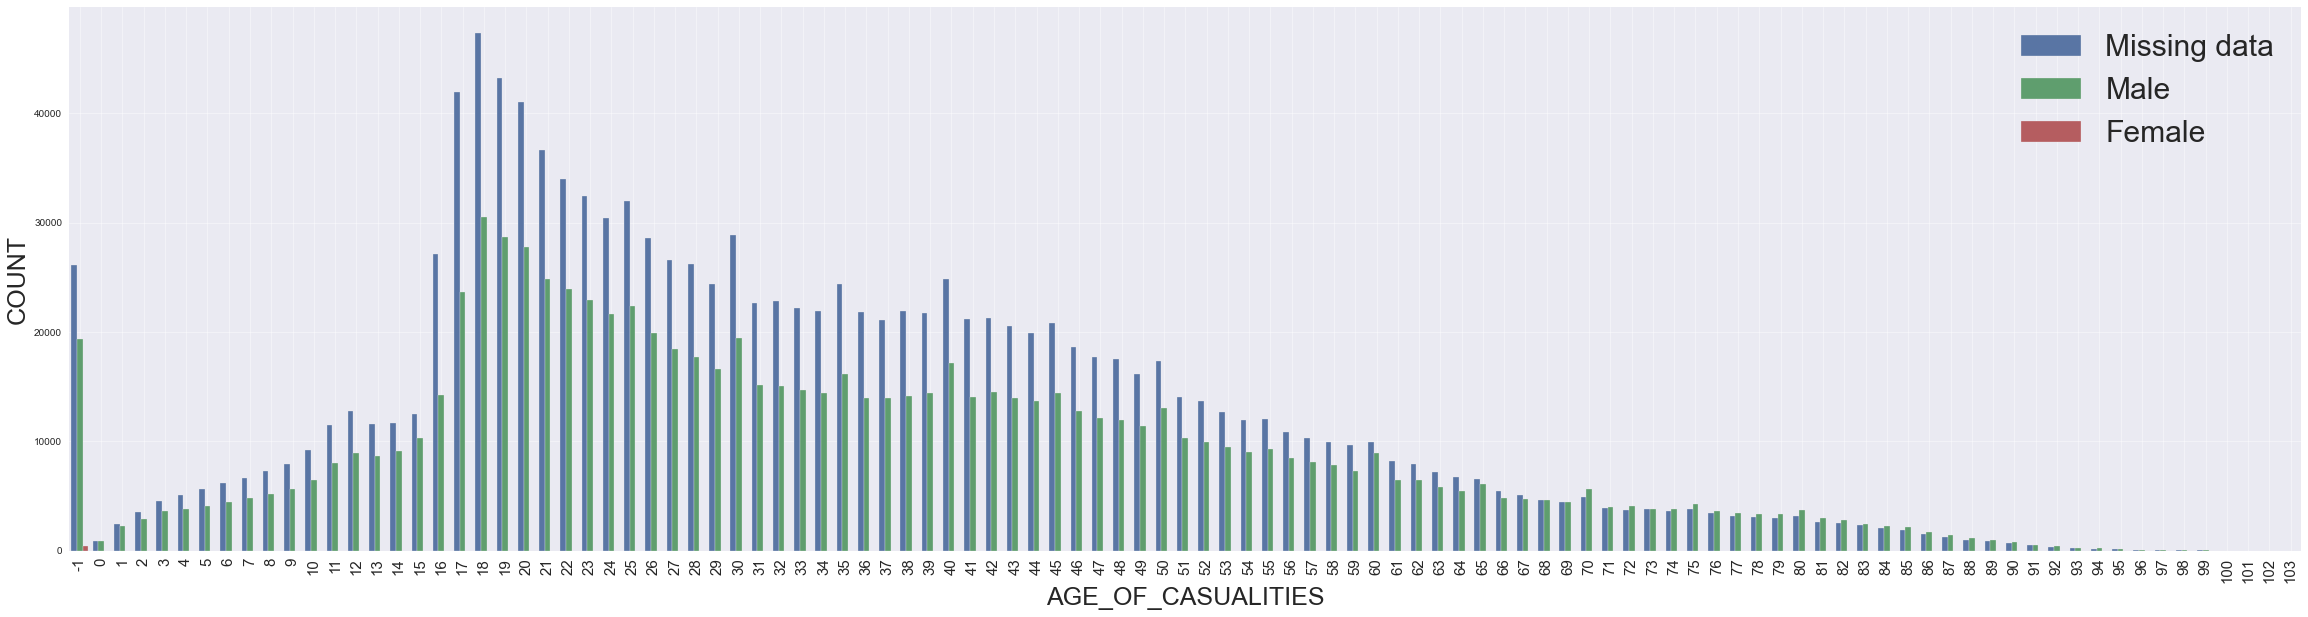

In [120]:
plt.figure(figsize=(40,10))
sns.countplot('Age_of_Casualty',hue='Sex_of_Casualty',data=casualties)
plt.xticks(fontsize=15,rotation=90)
plt.legend(['Missing data','Male','Female'],prop={'size': 30}, loc=1)
plt.grid(alpha=0.4)
plt.xlabel('AGE_OF_CASUALITIES', fontsize=25)
plt.ylabel('COUNT', fontsize=25)
plt.show()

#more males

**Distribution of casualty class**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


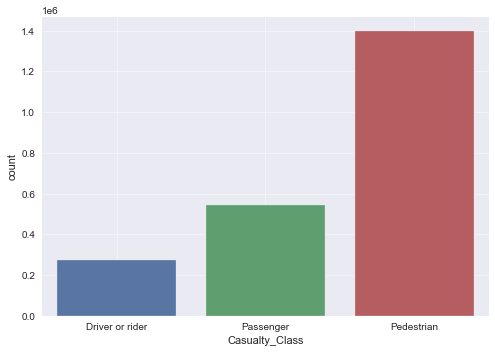

In [158]:
plt.figure()
ax=sns.countplot('Casualty_Class', data=casualties)
ax.set_xticklabels(['Driver or rider','Passenger','Pedestrian'])
plt.grid(alpha=0.4)
plt.show()

#more pedestrian

## Accidents-Casualties

**Merge the Accidents and Casualties datasets**

In [161]:
#merge datasets
df = accidents.reset_index().merge(casualties, right_index=True, left_index=True)
df.head(10)

,Date,level_0,index,Accident_Index_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,...,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,2010-01-01,0,0,201042I000801,616890.0,218160.0,1.145647,51.819901,Essex,Slight,...,37,7,2,1,1,0,0,-1,0,1
1,2010-01-01,1,1,2010160D00251,507250.0,427600.0,-0.375621,53.733764,Humberside,Slight,...,37,7,3,0,0,0,4,-1,11,1
2,2010-01-01,2,2,201042I000601,600060.0,224770.0,0.905620,51.885531,Essex,Slight,...,62,9,3,0,0,0,0,-1,9,1
3,2010-01-01,3,3,201042I000701,616020.0,215510.0,1.131393,51.796447,Essex,Slight,...,30,6,3,5,2,0,0,-1,0,1
4,2010-01-01,4,4,201042I000301,604510.0,223730.0,0.969574,51.874579,Essex,Serious,...,49,8,3,0,0,0,0,-1,3,-1
5,2010-01-01,5,5,201004BC10003,333170.0,438470.0,-3.017092,53.838163,Lancashire,Slight,...,30,6,3,0,0,0,0,-1,3,1
6,2010-01-01,6,6,201020D045212,413560.0,295860.0,-1.801415,52.560380,West Midlands,Slight,...,31,6,3,0,0,0,0,-1,3,-1
7,2010-01-01,7,7,201042I000501,542320.0,207270.0,0.060130,51.746010,Essex,Slight,...,13,3,3,6,9,0,0,-1,0,1
8,2010-01-01,8,8,201060L000337,259240.0,371720.0,-4.109940,53.223813,North Wales,Slight,...,13,3,3,6,9,0,0,-1,0,1
9,2010-01-01,9,9,2010120000593,478670.0,466510.0,-0.798765,54.088499,North Yorkshire,Slight,...,35,6,3,0,0,0,0,-1,9,1


**Subset the data to answer the first question.**

In [162]:
df1 = df[['Date','Accident_Index_x', 'Accident_Severity','Number_of_Casualties' ,'Road_Type','Speed_limit','Junction_Detail', 
          'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
          'Age_of_Casualty','Sex_of_Casualty', 'Casualty_Class', 'Casualty_Type', 'Special_Conditions_at_Site']]

**Look at the very first observations of df1.**

In [163]:
df1.head()

,Date,Accident_Index_x,Accident_Severity,Number_of_Casualties,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Age_of_Casualty,Sex_of_Casualty,Casualty_Class,Casualty_Type,Special_Conditions_at_Site
0,2010-01-01,201042I000801,Slight,1,Single carriageway,60,Not at junction or within 20 metres,Daylight,Fine no high winds,Frost or ice,Rural,37,Male,Pedestrian,0,0
1,2010-01-01,2010160D00251,Slight,2,Single carriageway,30,Not at junction or within 20 metres,Darkness - lights lit,Fine no high winds,Frost or ice,Urban,37,Male,Passenger,11,0
2,2010-01-01,201042I000601,Slight,1,Dual carriageway,30,T or staggered junction,Daylight,Fine no high winds,Frost or ice,Urban,62,Male,Driver or rider,9,0
3,2010-01-01,201042I000701,Slight,1,One way street,30,Not at junction or within 20 metres,Daylight,Other,Frost or ice,Urban,30,Male,Pedestrian,0,0
4,2010-01-01,201042I000301,Serious,1,Single carriageway,60,T or staggered junction,Darkness - no lighting,Snowing no high winds,Wet or damp,Rural,49,Male,Driver or rider,3,0


## Data Exploration

**Ccheck the number of accidents by date in our data.**

In [165]:
df1.groupby('Date').size().sort_values(ascending=False)

Date
2010-10-01    638
2010-02-01    615
2011-09-28    589
2011-12-12    587
2010-11-05    586
             ... 
2011-01-02    134
2011-12-25    128
2012-12-25    124
2010-01-10    120
2014-12-25    116
Length: 2191, dtype: int64

**Look at the Accident Severity by casualty class, sex of casualty, light conditions, and road type**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


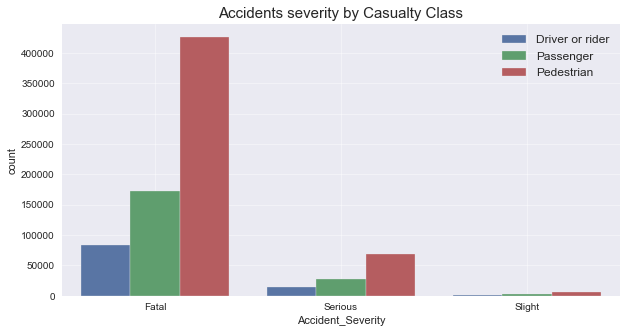

In [167]:
#Accidents severity by casualty class

plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity',hue='Casualty_Class',data=df1)
plt.legend(['Driver or rider','Passenger','Pedestrian'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('Accidents severity by Casualty Class', fontsize=15)
plt.grid(alpha=0.4)

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


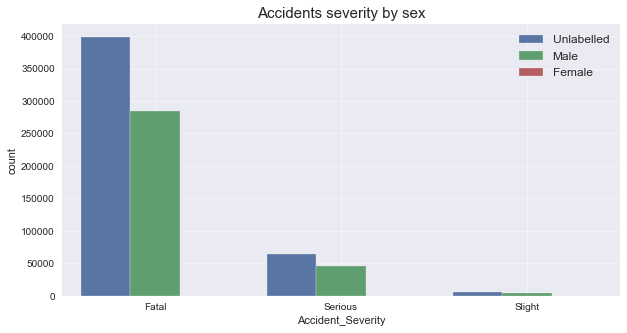

In [168]:
#Accidents severity by sex

plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity',hue='Sex_of_Casualty',data=df1)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(['Unlabelled','Male','Female'],fontsize=12)
plt.title('Accidents severity by sex', fontsize=15)
plt.grid(alpha=0.4)

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


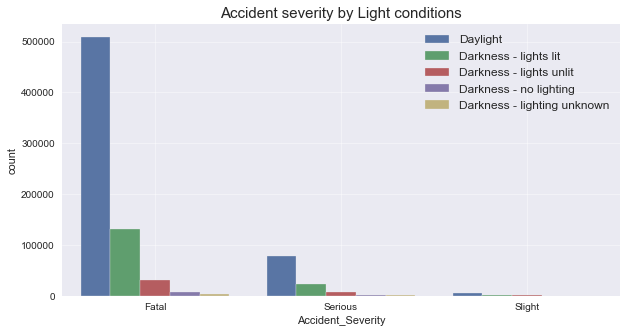

In [169]:
#Accidents severity by light conditions

plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity', hue='Light_Conditions', data=df1)
plt.legend(['Daylight','Darkness - lights lit','Darkness - lights unlit','Darkness - no lighting','Darkness - lighting unknown'],fontsize=12)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.title('Accident severity by Light conditions', fontsize=15)
plt.grid(alpha=0.4)

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


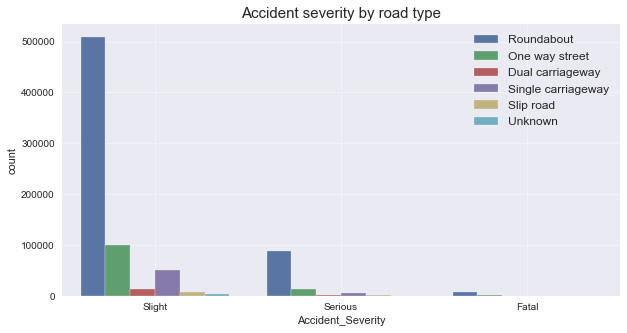

In [170]:
#Accidents severity by road type

plt.figure(figsize=(10,5))
sns.countplot('Accident_Severity', hue='Road_Type', data=df1)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.legend(['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','Unknown'], fontsize=12)
plt.title('Accident severity by road type', fontsize=15)
plt.grid(alpha=0.4)

## Question 1: How do environmental conditions (road type, light conditions, etc.) affect number of accidents ?

**Distribution of accidents based on road type:**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


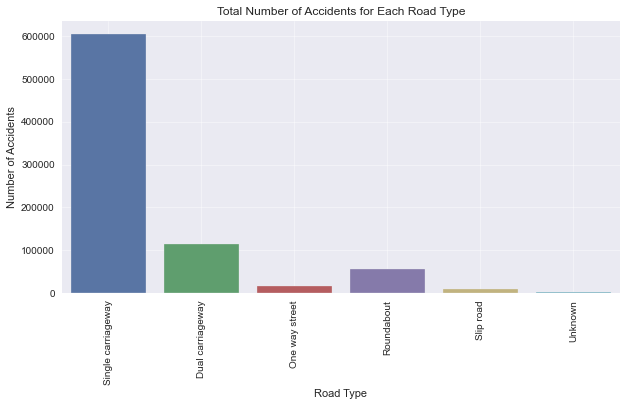

In [171]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Road_Type',data=accidents)
plt.xticks(rotation=90)
plt.grid(alpha=0.4)
plt.title('Total Number of Accidents for Each Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

**Distribution of accidents based on light conditions**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/zv/s48v24ws6gq1pfmppbzwjvs00000gn/T/ipykernel_59750/4247416742.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=90)


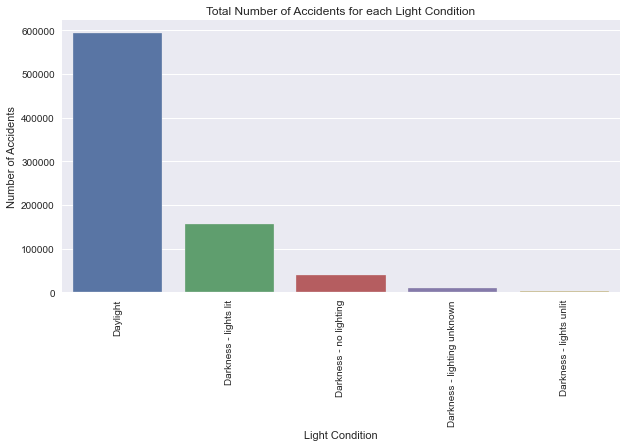

In [173]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Light_Conditions',data=accidents) 
plt.xticks(Rotation=90)
plt.title('Total Number of Accidents for each Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

**Distribution of accidents based on weather condition:**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


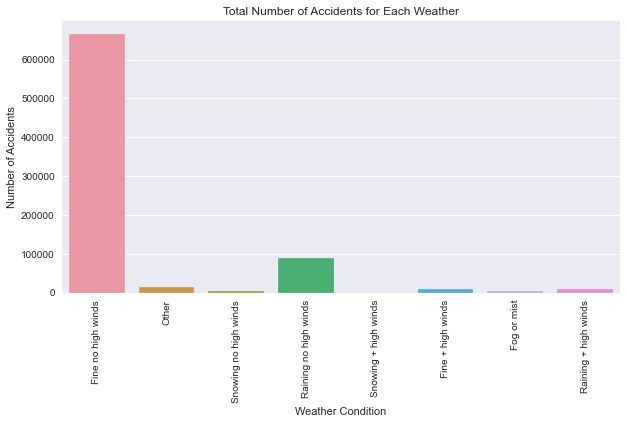

In [175]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Weather_Conditions',data=accidents)
plt.xticks(rotation=90)
plt.title('Total Number of Accidents for Each Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

**Distribution of accidents based on urban-rural:**

/Users/ersankucukoglu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


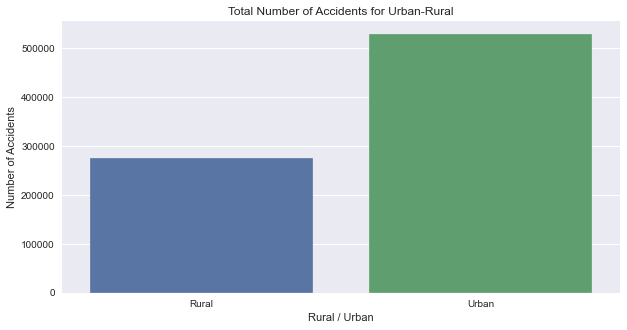

In [176]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Urban_or_Rural_Area',data=accidents)
plt.title('Total Number of Accidents for Urban-Rural')
plt.xlabel('Rural / Urban')
plt.ylabel('Number of Accidents')
plt.style.use('seaborn')

In [2]:
!nbmerge accidents_analysis_1.ipynb data_manipulation.ipynb > UK_Accidents_Analysis.ipynb